# Дополнительная задача

![image.png](images/problem_additional.png)

Подключаем необходимые библиотеки

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Заданные параметры

In [32]:
a0 = 1
a1 = 0.002
omega0 = 5.1
omega1 = 5
T = 2 * np.pi

# a0 = 1
# a1 = 0.002
# omega0 = 10
# omega1 = 16
# T = 2 * np.pi

Заданная функция

In [33]:
def func(t):
    return a0 * np.sin(omega0 * t) + a1 * np.sin(omega1 * t)

Построение графика

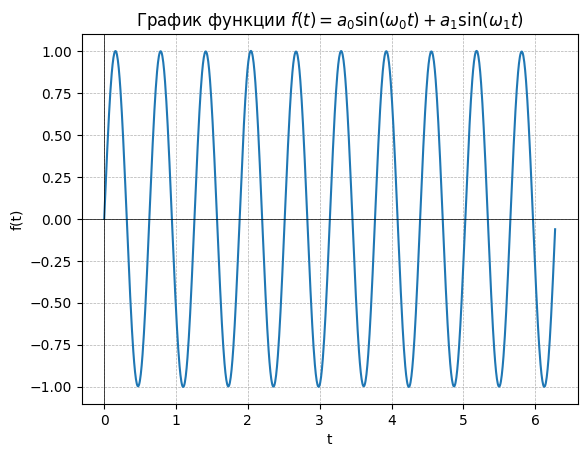

In [34]:
t = np.linspace(0, T, 1024, endpoint=False)

plt.plot(t, func(t))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('График функции $f(t) = a_0 \sin(\omega_0 t) + a_1 \sin(\omega_1 t)$')
plt.show()

 $$ \tilde {f}_ {j}  =  \frac {T}{n}  \sum _ {k=0}^ {n-1}  f_ {k}  exp(i  \omega_j t_{k}) $$


In [35]:
def manual_fftfreq(N, T):
    freq = np.zeros(N)
    for k in range(N):
        if k < N // 2:
            freq[k] = k / T
        else:
            freq[k] = (k - N) / T
    return freq

def manual_fft(signal):
    N = len(signal)
    F = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            F[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return F

def manual_ifft(F):
    N = len(F)
    f = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            f[n] += F[k] * np.exp(2j * np.pi * k * n / N)
    return f / N

Окно Ханна:
$$
h_k = \frac{1}{2} \left( 1 - \cos\left( \frac{2\pi k}{n} \right) \right), \quad 0 \leq k < n
$$

In [36]:
N = 1024

t = np.linspace(0, T, N, endpoint=False)

# Сигнал
f = func(t)

# Прямоугольное окно
rect_window = np.ones(N)

# Окно Ханна
hann_window = 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))

# Применение окон к сигналу
f_rect = f * rect_window
f_hann = f * hann_window

# Вычисление ДПФ для обоих сигналов
F_rect = manual_fft(f_rect)
F_hann = manual_fft(f_hann)

# Спектры мощности
P_rect = np.abs(F_rect) ** 2
P_hann = np.abs(F_hann) ** 2

# Вычисление частот
freq = manual_fftfreq(N, T)

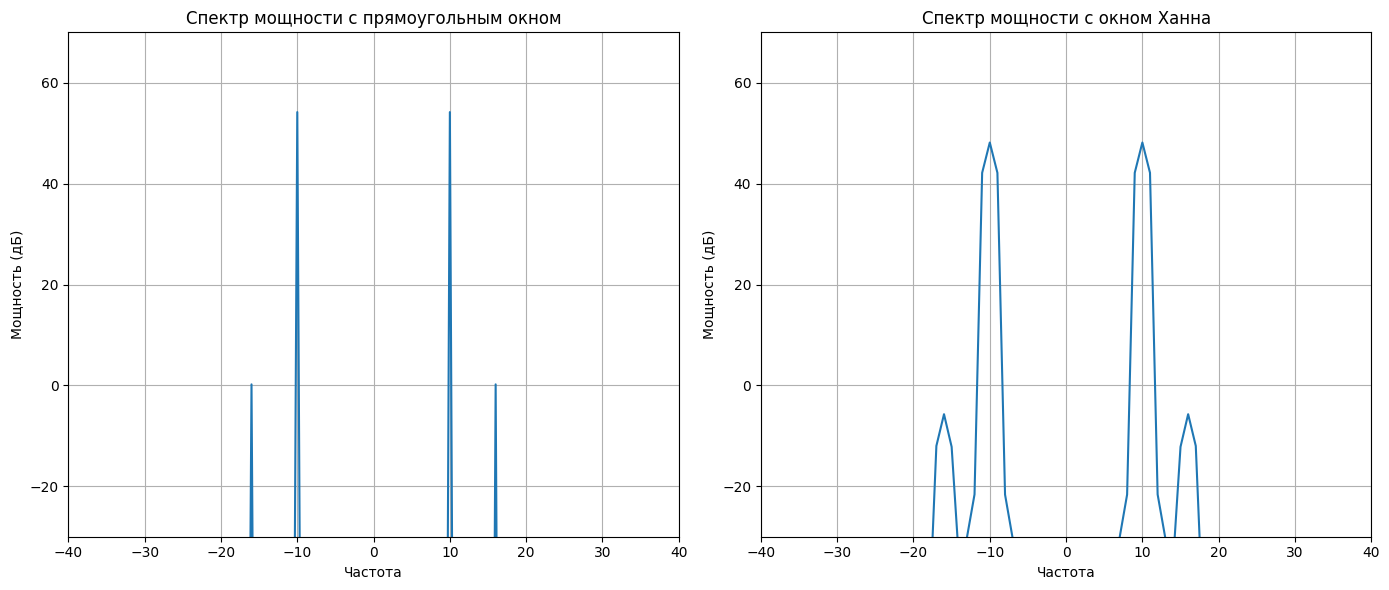

In [37]:
# Построение графиков
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(2*np.pi*freq, 10 * np.log10(P_rect))
plt.xlim(-40, 40)
plt.ylim(-30, 70)
plt.title('Спектр мощности с прямоугольным окном')
plt.xlabel('Частота')
plt.ylabel('Мощность (дБ)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(2*np.pi*freq, 10 * np.log10(P_hann))
plt.xlim(-40, 40)
plt.ylim(-30, 70)
plt.title('Спектр мощности с окном Ханна')
plt.xlabel('Частота')
plt.ylabel('Мощность (дБ)')
plt.grid()

plt.tight_layout()
plt.show()

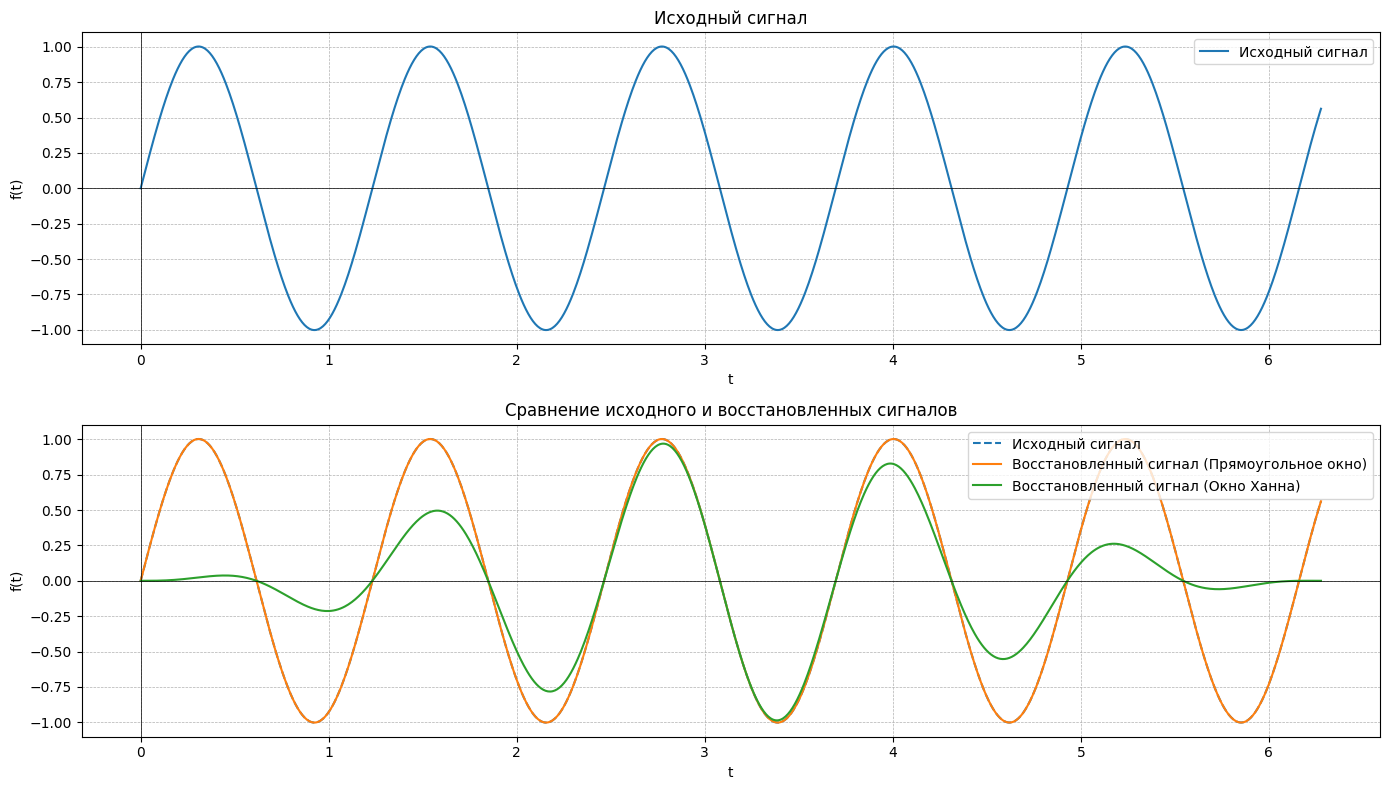

In [65]:
f_rect_reconstructed = manual_ifft(F_rect)
f_hann_reconstructed = manual_ifft(F_hann)

# Построение графиков
plt.figure(figsize=(14, 8))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(t, f, label='Исходный сигнал')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Исходный сигнал')
plt.legend()

# Восстановленные сигналы
plt.subplot(2, 1, 2)
plt.plot(t, f, label='Исходный сигнал', linestyle='--')
plt.plot(t, f_rect_reconstructed.real, label='Восстановленный сигнал (Прямоугольное окно)')
plt.plot(t, f_hann_reconstructed.real, label='Восстановленный сигнал (Окно Ханна)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Сравнение исходного и восстановленных сигналов')
plt.legend()

plt.tight_layout()
plt.show()